In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Activation, Flatten, Dropout,BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

from sklearn import datasets
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

import io


# Fasion Mnist CNN

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()     

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

4431872/4422102 [==============================] - 0s 0us/step


# CNN 네트워크 구성

In [6]:
input_size = (28,28,1)

model = Sequential()

model.add(  Convolution2D(32, kernel_size=(3,3), padding='same', 
                          activation='relu',  input_shape = input_size,)    )   
model.add(  Convolution2D(32, kernel_size=(3,3), padding='same',  )    )   
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(  Convolution2D(64, kernel_size=(3,3), padding='same' )    )   
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

# Fashion-mnist CNN 네트워크


In [7]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),
                     activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# history = model.fit(x_train, y_train , batch_size=32,  epochs=50, verbose=1)

In [8]:
history = model.fit(x_train, y_train , batch_size=32,  epochs=1, verbose=1)

1875/1875 [==============================] - 50s 4ms/step - loss: 0.5947 - accuracy: 0.7916


In [9]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),
                     activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=5, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5258 - accuracy: 0.8116
Epoch 2/5
187

In [11]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=5, verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [10]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [12]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)               

In [13]:
# x_train = (60000,28,28) ->    reshape(-1,28,28,1)    ->    (60000,28,28,1)
input_shape = ( 28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 32)         

# GPU 사용하기

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [14]:
with tf.device(device_name): 
  input_shape = (28, 28, 1)

  model = Sequential()

  model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(64, kernel_size=(3, 3),  padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
  model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu')) 
  model.add(Dense(10, activation='softmax'))
  model.summary()
  model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
  history = model.fit(x_train, y_train , batch_size=32,  epochs=20, verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 32)         

In [ ]:
with tf.device(device_name):
    input_shape = ( 28, 28, 1)
    model = Sequential()
    model.add(Convolution2D(input_shape=input_shape, filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

    model.summary()
    history = model.fit(x_train, y_train , batch_size=32,  epochs=50, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 50)        200       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 50)       

In [ ]:
with tf.device(''):
    input_shape = ( 28, 28, 1)
    model = Sequential()
    model.add(Convolution2D(input_shape=input_shape, filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

    model.summary()
    history = model.fit(x_train, y_train , batch_size=32,  epochs=1, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 50)       

# DataGenerator를 이용한 한글 인식

In [27]:
X = 255 - np.load('/content/drive/MyDrive/Colab Notebooks/8월 자연어처리, OpenCV, 텐서플로/3. 딥러닝/X-h.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/8월 자연어처리, OpenCV, 텐서플로/3. 딥러닝/y-h.npy')  #  한글 980자, 46060개의 이미지  # 46060x32x32x3
num_classes = np.max(y) + 1
print(X.shape)
print(y.shape)
print(np.max(y))
print(num_classes)

(46060, 32, 32, 3)
(46060,)
979
980


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


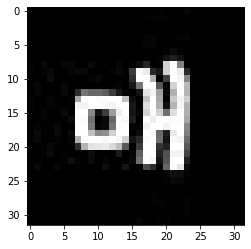

In [28]:
plt.imshow(X[232, :, :, 0], cmap='gray' )

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

x_train = x_train[:,:,:, 0]  # Nx32x32
x_test = x_test[:,:,:, 0]

x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1) 

In [30]:
#Data Augmentation
batch_size = 128
train_generator = ImageDataGenerator(rescale=1./255,   
                                     rotation_range=15,  
                                     width_shift_range=0.15, 
                                     height_shift_range=0.15,   
                                     shear_range=0.2,  zoom_range=[0.8, 1.2])

test_generator = ImageDataGenerator(rescale=1./255)

train_data_flow = train_generator.flow(x_train, y_train, batch_size=batch_size)
test_data_flow = test_generator.flow(x_test, y_test, batch_size=batch_size)

In [31]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=(32,32,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.50))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',   optimizer=RMSprop(learning_rate=0.001, rho=0.9),   metrics=['accuracy'])

In [32]:
hist = model.fit_generator(train_data_flow, epochs=5, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
288/288 [==============================] - 22s 66ms/step - loss: 6.8895 - accuracy: 0.0015
Epoch 2/5
288/288 [==============================] - 19s 64ms/step - loss: 6.8682 - accuracy: 8.6634e-04
Epoch 3/5
288/288 [==============================] - 19s 66ms/step - loss: 6.1668 - accuracy: 0.0079
Epoch 4/5
288/288 [==============================] - 19s 67ms/step - loss: 5.2522 - accuracy: 0.0304
Epoch 5/5
288/288 [==============================] - 19s 67ms/step - loss: 4.4738 - accuracy: 0.0691


In [33]:
def hangul_cnn_model() :
  model = Sequential()
  model.add(Convolution2D(32, (3, 3), padding='same',
                  input_shape=(32,32,1)))
  model.add(Activation('relu'))
  model.add(Convolution2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Convolution2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.50))

  model.add(Convolution2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(loss='sparse_categorical_crossentropy',   optimizer=RMSprop(learning_rate=0.001, rho=0.9),   metrics=['accuracy'])

  return model

In [35]:
model = hangul_cnn_model()

In [36]:
hist = model.fit(train_data_flow, epochs=10, verbose=1)

Epoch 1/10
288/288 [==============================] - 21s 66ms/step - loss: 6.8891 - accuracy: 5.5191e-04
Epoch 2/10
288/288 [==============================] - 19s 66ms/step - loss: 6.8879 - accuracy: 8.7198e-04
Epoch 3/10
288/288 [==============================] - 19s 66ms/step - loss: 6.8801 - accuracy: 0.0011
Epoch 4/10
288/288 [==============================] - 19s 66ms/step - loss: 6.3208 - accuracy: 0.0077
Epoch 5/10
288/288 [==============================] - 19s 67ms/step - loss: 5.3677 - accuracy: 0.0303
Epoch 6/10
288/288 [==============================] - 19s 67ms/step - loss: 4.5064 - accuracy: 0.0718
Epoch 7/10
288/288 [==============================] - 19s 67ms/step - loss: 3.8520 - accuracy: 0.1337
Epoch 8/10
288/288 [==============================] - 19s 67ms/step - loss: 3.2940 - accuracy: 0.2005
Epoch 9/10
288/288 [==============================] - 19s 66ms/step - loss: 2.8354 - accuracy: 0.2717
Epoch 10/10
288/288 [==============================] - 19s 66ms/step - los

In [37]:
model.save('hangul_cnn.h5')

In [38]:
 model2 = keras.models.load_model("hangul_cnn.h5")
 model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 64)      

(32, 32, 1)
[431]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


복


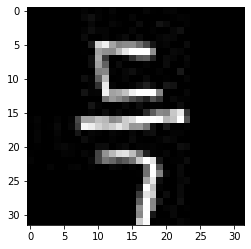

In [40]:
test = x_test[0]  # 32x32x1
print(test.shape)
plt.imshow(test.reshape(32,32), cmap='gray')

#p = model.predict(test.reshape(1,32,32,1))   # 4차원  1x32x32x1
p = model.predict_classes(test.reshape(1,32,32,1))   # 4차원  1x32x32x1
print(p)

labels_file = io.open("/content/drive/MyDrive/Colab Notebooks/8월 자연어처리, OpenCV, 텐서플로/3. 딥러닝/label.txt", 'r', encoding='utf-8').read().splitlines()
#labels_file
print(labels_file[p[0]  ])

# Open CV 연동 한글 인식

In [42]:
import keras
import io
import cv2

model = keras.models.load_model("hangul_cnn.h5")
labels_file = io.open("/content/drive/MyDrive/Colab Notebooks/8월 자연어처리, OpenCV, 텐서플로/3. 딥러닝/label.txt", 'r', encoding='utf-8').read().splitlines()

ix,iy = -1,-1
drawing = False
img = np.zeros((256,256), np.uint8)

def draw(event,x,y,flags,param):
    global ix,iy,drawing, img
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y        
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img,(ix,iy),(x,y),(255,255,255),15)
            ix = x
            iy = y             
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False    
        
        
cv2.imshow('image',img)
cv2.setMouseCallback('image',draw)          


while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1)
    
    if k == 32 :
        img2 = cv2.resize(img, (32, 32), interpolation = cv2.INTER_LINEAR)
        plt.imshow(img2, cmap='gray')
        plt.show()        
        
        img2 = 1 - img2.reshape(1,32,32,1) / 255
        id = np.argmax(model.predict(img2))
        print(labels_file[id])
        img = np.zeros((256,256), np.uint8)           
        
        
    elif k == 27:
        break

cv2.destroyAllWindows()  

DisabledFunctionError: ignored

# ImageNet 을 이용한  영상인식

In [48]:
from keras.applications.vgg16 import VGG16, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

<class 'PIL.Image.Image'>
(224, 224, 3)
(1, 224, 224, 3)


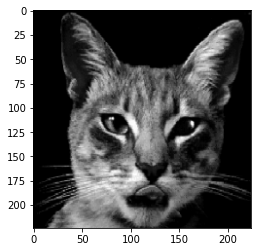

In [49]:
image = load_img('/content/drive/MyDrive/Colab Notebooks/8월 자연어처리, OpenCV, 텐서플로/3. 딥러닝/cat.png', target_size=(224, 224))
plt.imshow(image)
print(type(image))
x = img_to_array(image)
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 1000)
[285]


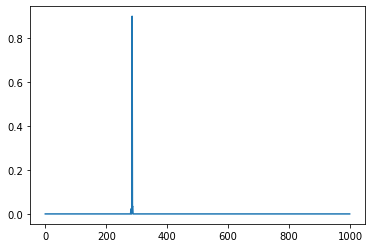

In [50]:
pred = model.predict(x)
print(pred.shape)
plt.plot(pred[0,:])
print( np.argmax(pred, axis=1)  )

In [51]:
print('Predicted:', decode_predictions(pred, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.90105987), ('n02127052', 'lynx', 0.034189563), ('n02125311', 'cougar', 0.03183695)]


In [53]:
with open("/content/drive/MyDrive/Colab Notebooks/8월 자연어처리, OpenCV, 텐서플로/3. 딥러닝/labels_h.txt", 'r', -1, 'utf-8') as f:    
     labels_h = f.read().splitlines()            
print(labels_h)      




['잉어의 일종', '금붕어', '백상아리', '범 상어', '귀상어', '전기 광선', '가오리', '수탉', '대단히', '타조', '되새', '금화', '하우스 핀치', '돌진', '인디고 멧', '남자 이름', '벌벌', '어치', '까치', '박새 속의 총칭', '물 까마귀', '연', '흰머리 독수리', '무자비한 사람', '큰 회색 올빼미', '유럽 \u200b\u200b화재 도롱뇽', '일반적인 영원', '이다', '발견 도롱뇽', '아 홀로 틀', '황소 개구리', '청개구리', '꼬리 개구리', '얼간이', '장수 거북', '진흙 거북', '후미 거북', '상자 거북', '줄무늬 도마뱀', '일반 이구아나', '미국의 카멜레온', '채찍 꼬리', '종교', '주름 장식 도마뱀', '악어 도마뱀', '길라 몬스터', '녹색 도마뱀', '아프리카 카멜레온', '코모도 왕 도마뱀', '아프리카 악어', '미국 악어', '트리케라톱스', '천둥 뱀', 'ringneck 뱀', 'hognose 뱀', '녹색 뱀', '왕 뱀', '가터 뱀', '물뱀', '포도 나무 뱀', '밤 뱀', '보아', '바위 파이썬', '인도 코브라', '그린 맘바', '바다 뱀', '뿔 독사', '다이아몬드', '사이드 와인 더', '삼엽충', 'harvestman입니다', '투석기', '블랙과 골드 정원 거미', '어린이 거미', '정원 거미', '블랙 위도우', '타란툴라 거미', '늑대 거미', '진드기', '지네', '블랙 그 라우스', '멧닭', '목도리 뇌조', '뇌조의 일종', '공작', '메추라기', '자고', '아프리카 회색', '앵무새', '유황 볏이 앵무새', '진훙 잉꼬의 일종', '코 칼류', '꿀벌 먹는 사람', '코뿔새', '벌새', 'Jasmer', '큰 부리 새', '드레이크', '붉은 가슴 비오리', '거위', '검은 백조', '큰 엄니가있는 동물', '가시 두더지', '오리너구리', '왈라비', '주머니 곰 코알라', '웜뱃', '해파리',

전화로 전화를 걸


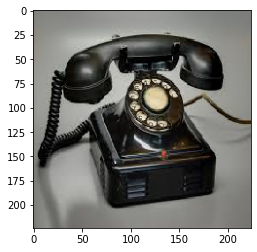

In [55]:
image = load_img('/content/drive/MyDrive/Colab Notebooks/8월 자연어처리, OpenCV, 텐서플로/3. 딥러닝/phone.jpg', target_size=(224, 224))
plt.imshow(image)
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
id = np.argmax(pred, axis=1)[0]
print(labels_h[id])

# zip 파일 풀기

In [62]:
! unzip smallcatdog.zip

unzip:  cannot find or open smallcatdog.zip, smallcatdog.zip.zip or smallcatdog.zip.ZIP.
